<img src="nebrija.jpg" style="width: 300px;" />


### MASTER DATA SCIENCE & BUSINESS ANALYTICS
**UNIVERSIDAD DE NEBRIJA**
# CASO PRÁCTICO FINAL

## INTRODUCCIÓN
Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web.

El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

### INFORMACIÓN DE LOS DATOS

El conjunto de datos consta de diez atributos numéricos y ocho categóricos.

El atributo `revenue` puede ser usado como la etiqueta de la clase.

Las variables `Administrative`, `administrative duration`, `informational`, `informational duration`, `product related` y `product related duration` representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.

Las características `bounce rate`, `exit rate` y `page value` representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico.

- El valor de la característica `bounce rate` de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión.
- El valor de la característica `exit rate` para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión.
- La función `Page Value` representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.

La característica de `special day` indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.

El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.

### TRABAJO A REALIZAR
Las siguientes son las tareas a realizar. 

1. Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.
2. Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado `Dropna().a`.
3. Tratamiento de categóricas, pasándolas a numéricas por medio de _dummies_, mapeándolas o utilizando un `label encoder`. Hay que justificar las operaciones que se realizan.
4. Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.
5. Estandarizar los datos.
6. Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con `CrossValidation` y `GridSearch`.
    - Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
    - Utilizar un modelo de redes neuronales.
    - Utilizar cualquier otro modelo de clasificación.
7. Optimizar algún parámetro de cada modelo utilizando `CrossValidation` y `GridSearch`, o de la forma que se estime oportuna, siempre justificándolo.
8. Elegir el mejor modelo de los tres según la métrica ROC en `CrossValidation`. Predecir Test y obtener una métrica estimada.
9. Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.
10. El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.

**Anotación**
Lo que se pide es un modelo _end-to-end_ como los vistos en prácticas en el módulo. En este caso, hay que aplicar tres modelos y escoger el mejor, pero la parte previa es común a los tres.

Se tendrán en cuenta la estructura del código, las interpretaciones y las justificaciones.

El esquema que se pone en las tareas es un esquema general. Si se necesita hacer alguna tarea, se puede llevar a cabo. También es posible aplicar cualquier otro algoritmo visto en el módulo, siempre justificando y haciendo las cosas con un sentido.

# SOLUCIÓN PROPUESTA

## Lectura del Juego de Datos
Comenzamos el trabajo con las tareas más esenciales de cualquier juego de dato, la lectura y limpieza del mismo para poder trabajar el análisis EDA con la certeza que no estamos asumiendo tendencias de los datos resultados de artefactos de las impureza de los mismos (Matsui E. y Peng R., 2017). 

In [1]:
import pandas as pd
raw_data = pd.read_csv("online_shoppers_intention.csv")
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Antes de revisar los tipos de columna y transformaciones necesarias, nos asesoramos que no existan datos faltantes. 

In [3]:
raw_data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Existen 14 registros faltantes en varias de las columnas. El número es el mismo en todas, por lo que puede que existan 14 filas con datos mal registrados. Para un juego de datos de 12,330 filas es una razón bastante pequeña, y si pudieramos eliminarlos ya, nos ahorraría mucho trabajo de imputación de datos innecesario. Revisemos las 14 filas bajo escrutinio. 

In [4]:
# Código extraído de https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values
null_data = raw_data[raw_data.isnull().any(axis=1)]
null_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


Los 14 registros parecen estar relativamente juntos, y pudieramos especular que fue un usuario con algún tipo de software para bloquear cookies o trackers. Dado que solo afecta al 0.11% de los registros, procedemos a depurar el juego de datos. 

In [5]:
raw_data.drop(labels=null_data.index, inplace=True, axis=0)
raw_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Nos interesa ver los rangos preliminares de la información cuantitativa, para tomar una idea qué más necesita cambio en el juego de datos. 

In [6]:
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Definitivamente el juego de datos no tiene volumen pero tiene variedad de columnas con diferentes tipos de datos que debemos profundizar un poco antes de seguir. Lo que nos interesa más aquí es el tipo de datos, rango, y que transformación sería la mejor antes de pasar al EDA. 

### Revisión de Tipo de Páginas
El tipo de páginas debe ser una variable importante, ya que tiene su propia columna segregada por _administrativa_, _informativa_ y _producto_. Nos interesa ver si son valores continuos o discretos, si los debemos tratar como valores de estudio o etiquetas de estudio.

In [7]:
web_pages = ["Administrative", 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
for pages in web_pages:
    print(u'Page ',pages,' - ', raw_data[pages].nunique(),'\n')

Page  Administrative  -  27 

Page  Administrative_Duration  -  3336 

Page  Informational  -  17 

Page  Informational_Duration  -  1259 

Page  ProductRelated  -  311 

Page  ProductRelated_Duration  -  9552 



En conclusión, hay 27 páginas administrativas, 17 de información, pero muchísimas de producto (311 para ser exactos). No hay mucho más que podamos inferir salvo que las páginas debieran pensarse como variables categóricas ordenadas (ordinales), por lo que preferimos moldearlas (cast) como enteros (Sharma, M., 2020). 

In [8]:
# Código extraído de https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/
raw_data[['Administrative', 'Informational', 'ProductRelated']] = raw_data[['Administrative', 'Informational', 'ProductRelated']].apply(pd.to_numeric, downcast='integer')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  int8   
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  int8   
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  int16  
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

### Mapeando Variables Categóricas a Numéricas
Existen dos variables adicionales que debemos mapear de categóricas a numéricas. Una es `Month`, o el mes del año, que es bastante sencilla de interpretar, pero la siguiente es `Weekend`, un indicador de si es o no fin de semana, y `VisitorType`, que nos gustaría verificar antes de aplicar un mapeo. 

In [9]:
raw_data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

No tiene mucho sentido el orden en las etiquetas, por lo que podemos establecer uno cualquiera en un mapa antes de proceder con la transformación (Keen, B., 2017) 

In [10]:
# Código extraído de https://benalexkeen.com/mapping-categorical-data-in-pandas/
raw_data['VisitorType'] = raw_data['VisitorType'].astype("category").cat.codes

Procedemos a verificar los valores de la columna `Weekend`. 

In [11]:
raw_data['Weekend'].unique()

array([False,  True])

Con dos valores del tipo _Boolean_, el mapeo será directo como 0 si es falso y 1 si es verdadero.

In [12]:
raw_data['Weekend'] = raw_data['Weekend'].astype("category").cat.codes
raw_data['Weekend'].unique()

array([0, 1], dtype=int8)

Antes de proceder a crear un mapa de los meses, revisemos la validez de los datos en la columna mes, ya que sin conocer las etiquetas puede ser difícil mapear las mismas. 

In [13]:
raw_data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Los valores únicos del atributo mes tienen formatos poco consistentes. Tendremos que crear un diccionario a mano para etiquetarlos como valores numéricos de forma segura (Exhenn, B., 2017). Aquí lo más importante en respecto al código es que `astype` en **Pandas** cambió hace dos años y los parámetros antiguos, sobre todo `ordered=True` ya no funcionan. Lo conveniente es utilizar `CategoricalDType` si el científico de datos le gusta crear mapas a mano (StackOverflow, 2018). En nuestro caso en particular utilizaremos un diccionario sencillo de mapeo. 

In [14]:
# NOTA: astype cambio en Pandas hace poco, utilizar CategoricalDType 
meses_ordenados = {"Month" :
                   {
                       'Jan' : 1,
                       'Feb' : 2,
                       'Mar' : 3,
                       'Apr' : 4,
                       'May' : 5,
                       'June' : 6,
                       'Jul' : 7,
                       'Aug' : 8,
                       'Sep' : 9,
                       'Oct' : 10,
                       'Nov' : 11,
                       'Dec' : 12}}

raw_data = raw_data.replace(meses_ordenados)

In [15]:
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,7.657113,2.124147,2.357584,3.148019,4.070477,1.718009,0.232624
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,3.391314,0.911566,1.718028,2.402211,4.024598,0.691086,0.422522
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000


### Estandarización del Juego de Datos
Es probable que para facilitar la tarea de clasificadores y diferentes modelos de aprendizaje automatizado sea conveniente estandarizar ciertos datos. Ahora bien, en nuestro juego de datos muchas columnas son numéricas pero sus valores son etiquetas numéricas de datos categóricos (por ejemplo `Browser` es solo el tipo de explorador que usa el usuario, no una valor contínuo de medición). Solo estaremos estandarizando aquellos datos que tengan sentido, para ser precisos:

- Administrative_Duration
- Informational_Duration
- ProductRelated_Duration
- BounceRates
- ExitRates
- PageValues
- SpecialDay

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lista = ['Administrative_Duration', 'Informational_Duration', 
         'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

raw_data[lista] = StandardScaler().fit_transform(raw_data[lista])
raw_data[lista].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04
mean,-2.834557e-15,6.095017e-15,3.814025e-16,1.010992e-15,-1.807403e-18,-4.395576e-15,1.236804e-14
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-4.631307e-01,-2.521407e-01,-6.253149e-01,-4.574577e-01,-8.861875e-01,-3.173762e-01,-3.090136e-01
25%,-4.574763e-01,-2.450394e-01,-5.281512e-01,-4.574577e-01,-5.917904e-01,-3.173762e-01,-3.090136e-01
50%,-4.122411e-01,-2.450394e-01,-3.114833e-01,-3.930405e-01,-3.684272e-01,-3.173762e-01,-3.090136e-01
75%,7.121059e-02,-2.450394e-01,1.412754e-01,-1.129328e-01,1.442022e-01,-3.173762e-01,-3.090136e-01
max,1.876043e+01,1.785878e+01,3.279405e+01,3.672627e+00,3.235371e+00,1.915619e+01,4.715823e+00


## Análisis Explorativo Data (EDA)
En nuestro caso en particular, la variable `Revenue` es el determinante de un caso exitoso o no de uso. Recordemos los dos puntos críticos del análisis.

1. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web.
2. Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

¿Qué variables de todas las disponibles influyen más en un cliente para finalizar una compra? ¿Mientras más productos se ven, más aumenta las ganas de comprar, porque definitivamente aumenta el _engagement_? ¿Son las épocas de fiesta momentos donde se dispara la venta digital? ¿Tiene el tipo de sistema operativo realmente alguna influencia en la decisión de compra? 

De acuerdo a los estudios preliminares del comienzo del comercio digital, los cuatro factores más importantes en la eficacia de las ventas digitales (Udo, G. y Marquis, G., 2001) son:

1. tiempo de descarga
2. navegación fácil
3. uso de imágenes
4. interactividad del sitio

Un estudio mucho más moderno y técnico (Bucko, J., Kakalejčík, L., y Ferencová, M., 2018) utiliza múltiples herramientas estadísticas (pero no de aprendizaje automático) para determinar que los factores principales son siete:

1. precio
2. disponibilidad
3. muestra social
4. escasez
5. información del producto
6. condiciones de venta
7. redes sociales

De acuerdo a la consultora de E-Commerce SnapRetail, los factores también son 7 (SnapRetail, 2017), pero difieren en algunos casos. 

1. envío gratis
2. velocidad de carga del sitio
3. uso incremental de mobil (y disponibilidad mobil)
4. descuentos y ofertas
5. e-mail marketing
6. mercadeo por redes sociales
7. experience de compra personalizada

Un cuarto estudio que utilizó redes neuronales y la base de datos del sitio en China Tabao.com para determinar factores de éxito, cita cuatro factores principales del exito de un sitio web comercial (Zao,Z. et al, 2019):

1. recomendaciones en linea
2. sistema de curación de recomendaciones
3. mercadeo promocional en linea
4. garantías del vendedor

Cómo científicos de datos podemos vernos extrañados que los estudios académicos que determinan los factores de éxito arrojan variables muy diferentes de las que nos provee el juego de datos. Habiendo dicho esto, existen bloques de hipótesis de trabajo interesantes que perseguir. 

* La primera tiene que ver con la información del producto y experiencia de compra. Conocemos de casa usuario el uso de las diferentes páginas administrativas, de información y producto, y si hubo o no compra. Este bloque amerita exploración visual para descubrir algún patrón. Este item también se relaciona con la curación del contenido de producto y recomendaciones que mencionan los estudios. 

* Los factores de promoción pudieran estar algo relacionados con fechas especiales, meses y cercacía con los fines de semana. Este segundo ángulo merece atención. 

* Aunque no lo mencionan ninguno de los estudios, los valores de _Bounce Rate_, _Exit Rate_ y _Page Value_ merecen atención también. Somos algos escépticos del _Page Value_ ya que mide una variable en relación al éxito de venta, por lo tanto debiera tener una alta correlación con el valor a predecir, lo que sería un resultado tautológico.  

### Cuantificado la Etiqueta de Ingresos
No sabemos cuanto ingreso tuvo la empresa, pero sabemos que hay un número finito de clientes que generaron ingresos porque la variable `Revenue` es `True`. Veamos la relación de forma visual. 

In [17]:
pd.crosstab(index=raw_data['Revenue'], columns='count')

col_0,count
Revenue,
False,10408
True,1908


### Analizando Información del Producto y Experiencia de Compra
Partamos de la idea que si los clientes pasan bastante tiempo en el sitio web, es probable que el aumento de _engagement_ impacte en la decisión de compra. Midamos entonces el tiempo agregado en cada tipo de página y como incide en la compra o no. 

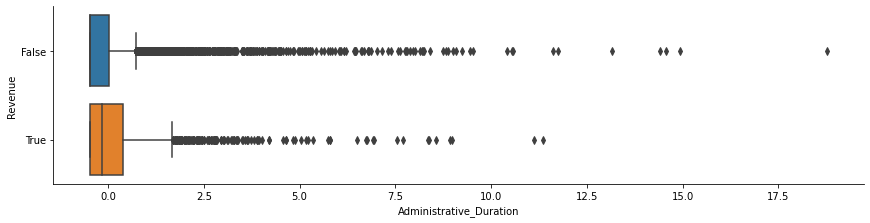

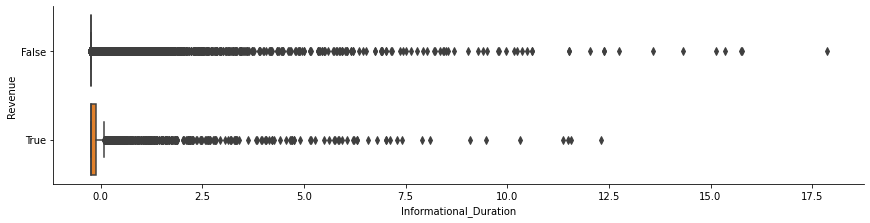

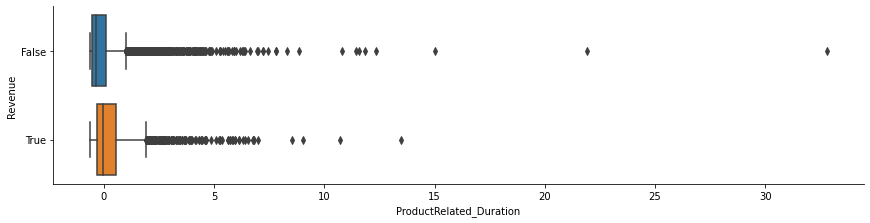

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#fig.suptitle('Análisis de Duración por Segmento e Intención de Compra')

sns.catplot(x="Administrative_Duration", y="Revenue", kind="box", 
            orient="h", height=3, aspect=4, data=raw_data)
sns.catplot(x="Informational_Duration", y="Revenue", kind="box", 
            orient="h", height=3, aspect=4, data=raw_data)
sns.catplot(x="ProductRelated_Duration", y="Revenue", kind="box", 
            orient="h", height=3, aspect=4, data=raw_data)
plt.show()


La información no arroja mucho para concluir más allá de que mientrás más permanezca una persona enganchada en el sitio, mayor es la probabilidad que compre algo. La duración de cada tipo de página esta normalizada, pero ha de notarse que para los casos negativos (no hubo compra) siempre se encuentra a la izquierda del valor 0, que en nuestro caso en la media del tiempo incurrido en cada segmento. Corolario, si los clientes no pasan por lo menos el tiempo medio en un segmento de página en particular, es más probable que no compren. 

### Analizando Factores de Promoción

Una hipótesis muy factible es que ciertas fechas tienen mayor impacto en la compra en linea. La primera fecha a analizar es el impacto de los fines de semana. 

In [19]:
tab = pd.crosstab(index=raw_data['Revenue'], columns=raw_data['Weekend'])
round(tab / len(raw_data.index),2)

Weekend,0,1
Revenue,,
False,0.65,0.19
True,0.11,0.04


Solo un 4% de la gente compra el fin de semana, y el 11% en los días de semana. La proporción de gente que no compra los fines de semana parece menor que la que no compra los días laborales sin embargo.

¿Cuál será la distribución de frecuencia en meses?

In [20]:
tab = pd.crosstab(index=raw_data['Revenue'], columns=raw_data['Month'])
round(tab / len(raw_data.index),2)

Month,2,3,5,6,7,8,9,10,11,12
Revenue,,,,,,,,,,
False,0.01,0.14,0.24,0.02,0.03,0.03,0.03,0.04,0.18,0.12
True,0.00,0.02,0.03,0.00,0.01,0.01,0.01,0.01,0.06,0.02


Noviembre es el mes donde se dispara la venta, con 6% del total. Mayo viene de segundo lugar con 3%. ¿Existe acaso alguna relación de los meses con fechas especiales?

In [21]:
tab = pd.crosstab(index=raw_data['SpecialDay'], columns=raw_data['Month'])
round(tab / len(raw_data.index),2)

Month,2,3,5,6,7,8,9,10,11,12
SpecialDay,,,,,,,,,,
-0.309014,0.01,0.15,0.18,0.02,0.04,0.04,0.04,0.04,0.24,0.14
0.695954,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.700921,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2.705888,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3.710856,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4.715823,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


El haber normalizado la data en el momento de explorar los datos es una ventaja y desventaja a la vez. En esta matriz es difícil analizar si las fechas especiales inciden mucho o poco en los meses del juego de datos. Quizás si solo nos limitamos a relacionar fechas especiales con resultados de ingresos la relación sea más sencilla de visualizar. 

In [22]:
tab = pd.crosstab(index=raw_data['Revenue'], columns=raw_data['SpecialDay'])
round(tab / len(raw_data.index),2)

SpecialDay,-0.309014,0.695954,1.700921,2.705888,3.710856,4.715823
Revenue,,,,,,
False,0.75,0.01,0.02,0.03,0.03,0.01
True,0.15,0.00,0.00,0.00,0.00,0.00


Un 15% de los ingresos parece estar muy relacionado con los días especiales, ya que la variable normalizada en -0,30 es muy cercana a la media (mu en cero) de la distribución de valores no normalizados que debieran tender a la medida central. 

### Analizando Bounce Rate, Exit Rate y PageValues

In [ ]:
sns.boxplot(y="PageValues", x="Revenue", data = raw_data)

In [ ]:
plt.plot(raw_data['ExitRates'])

In [ ]:
bar = [raw_data['BounceRates'].values,raw_data['ExitRates'].values]
bar

## Entrenamiento de Datos
En la siguiente sección procedemos a revisar tres técnicas diferentes de aprendizaje automático para clasificación de si los consumidores tienen más alta probabilidad de hacer compras por web. Estas son:

1. Regresión logística
2. Red Neuronal (Perceptrón multicapas)
3. KNN

Para cada uno de estos utilizaremos el mismo juego de datos de entrenamiento y validación. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mglearn

X = raw_data.loc[:, raw_data.columns != 'Revenue']
y = raw_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021, stratify=y)
print(u'Dimensiones en train \n-X:{}\n-Y{}'.format(X_train.shape, y_train.shape))
print(u'Dimensiones en test  \n-X:{}\n-Y{}'.format(X_test.shape, y_test.shape))

Dimensiones en train 
-X:(8621, 17)
-Y(8621,)
Dimensiones en test  
-X:(3695, 17)
-Y(3695,)


En los ejemplos de diferentes modelos de entrenamiento de datos, utilizaremos siempre validación cruzada para entrenar y validar el modelo y los hiperparámetros, y el juego de test para evaluar los resultados de precisión y area bajo la curva. 

### Clasificador con Regresión Logística
Los clasificadores con regresión logística han sido métodos comprobados de aprendizaje automático por decadas, y es conveniente comenzar por este método sencillo y medir los resultados antes de avanzar a otro más potente (Daroczi, G., 2015). Veamos los resultados del entrenamiento de un clasificador con regresión logística. 

In [40]:
# Código original https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=500, penalty='l2').fit(X_train, y_train)
clf.score(X_train, y_train)

0.8830762092564668

Para el modelo de regresión logística se utilizó la librería `LogisticRegresionCV` que automáticamente incluye validación cruzada de los datos. El puntaje del clasificador que obtenemos es 0.88. Sin embargo los primeros intentos no pudieron converger bien hasta que ajustamos el parámetro de `max_iter=500` para aumentar el ciclo de iteraciones. Ajustar el número de validaciones cruzadas de 10 a 5 tuvo una mejora marginal en el puntaje del clasificador (0.882 a 0.883). Este es el puntaje de entrenamiento, pero debemos revisar las métricas del error fuera de muestra con el juego de datos de evaluación. 

In [41]:
# Predecir resultados en el conjunto de evaluación
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)

# Crear métricas
auc = roc_auc_score(y_test, y_test_prob[:, 1])
print("- Precision: ", round(precision_score(y_test, y_test_pred),2))
print("- Recall : ", round(recall_score(y_test, y_test_pred),2))
print("- F-Score : ", round(f1_score(y_test, y_test_pred), 2))
print("- AUC: ", round(auc, 2))

- Precision:  0.75
- Recall :  0.36
- F-Score :  0.49
- AUC:  0.88


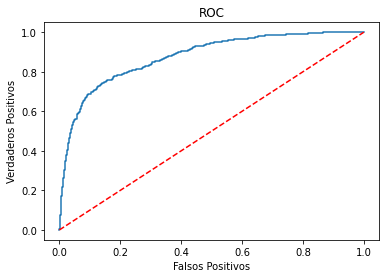

In [26]:
# Curva AUC
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

En lineas generales, el clasificador usando regresión lineal tuvo un puntaje bueno. El uso de la librería `LogisticRegresionCV` agiliza la validación cruzada, pero los hiperparámetros se deben cambiar en las llamadas con cada ejecución de un ciclo de entrenamiento. 

### Clasificador con Redes Neuronales
El poder de las redes neuronales viene condicionado al uso correcto y ajuste de múltiples hiperparámetros, y la precisión del clasificador puede verse comprometida por el tiempo invertido en entrenar el modelo versus el uso de uno menos preciso pero ciertamente más rápido y menos costoso en ciclos computacionales. La documentación de la librería **SciKit** es extenso pero no muy clara en la aplicación correcta del código de automatización de búsqueda de parámetros con **GridSearchCV**. Por suerte existe un artículo claro sobre los pasos a seguir para el ajuste de hipérparámetros en una red neuronal perceptrón multicapas usando GridSearchCV por los científicos de datos Ankit Agrawal y Bruno Lubascher que dividen la estructura del código en cinco secciones (Lubascher, B. y Agrawal, A., 2019):

1. Elección del clasificador
2. Definición de un diccionario de hiperparámetros
3. Entrenamiento
4. Obtener mejor combinación de parámetros
5. Evaluación en el juego de test

Para el caso en cuestión, se han seleccionado parámetros específicos en la red neuronal con el objetivo de maximizar el puntaje del modelo. 

`max_iter`: el número de ciclos de iteracción para que el modelo converga. Luego de la experiencia del modelo de regresión logística, se utilizó un vector de 100, 200 y 300 ciclos (NOTA: la primera vez se utilizó 500 ciclos pero el entrenamiento sobrecalentó el computador y se tuvo que abortar el proceso cuando la temperatura llegó a 97 grados).

`hidden_layer_sizes`: para la topología propia de la red, se utilizó tres combinaciones de capaz ocultas. 

`activation`: las funciones de activación, se seleccionó ReLU (activación rectificada lineal) y _tanh_ (tangente hiperbólica), que son funciones relativamente comunes en problemas de clasificación. 

`solver`: este hiperparámetro incluye los algoritmos de optimización. Se eligieron Adam que tiene un uso muy eficiente de ciclos computacionales, y _sgd_ que utiliza decenso gradual estocástico (también uno de los algorítmos que más años tiene en la ciencia del aprendizaje automatizado). 

`alpha`: término que define la penalización L2 (impacta los pesos más grandes para regularizar como converge el modelo). Se utilizó dos tasas, una más consevadora y una más aggresiva. 

`learning rate`: tasa de aprendizaje. Se optó por opciones para una tasa constante y una adaptable (que mantiene la misma tasa de aprendizaje mientras la función de pérdida se minimice). 

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

mlp = MLPClassifier()

parameters_cv = {
    'max_iter' :[100,200,300],
    'hidden_layer_sizes': [(16,16,16), (16,32,24), (16,24,8)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf4 = GridSearchCV(mlp, parameters_cv, n_jobs = 4, cv=3)
clf4.fit(X_train, y_train)

score = clf4.score(X_test,y_test)
print("Precisión (en juego de test) = ", score)
y_true, y_pred = y_test, clf4.predict(X_test)
print(classification_report(y_true, y_pred))
 


Precisión (en juego de test) =  0.8893098782138025
              precision    recall  f1-score   support

       False       0.93      0.94      0.93      3123
        True       0.64      0.64      0.64       572

    accuracy                           0.89      3695
   macro avg       0.79      0.79      0.79      3695
weighted avg       0.89      0.89      0.89      3695



In [36]:
# Predecir resultados en el conjunto de evaluación
y_test_pred = clf4.predict(X_test)
y_test_prob = clf4.predict_proba(X_test)

# Crear métricas
auc = roc_auc_score(y_test, y_test_prob[:, 1])
print("- Precision: ", round(precision_score(y_test, y_test_pred),2))
print("- Recall : ", round(recall_score(y_test, y_test_pred),2))
print("- F-Score : ", round(f1_score(y_test, y_test_pred), 2))
print("- AUC: ", round(auc, 2))


- Precision:  0.64
- Recall :  0.64
- F-Score :  0.64
- AUC:  0.9


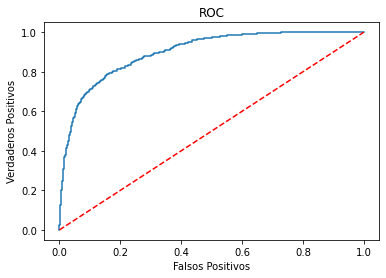

In [37]:
# Curva AUC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

In [38]:
# Best paramete set
print('Best parameters found:\n', clf4.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (16, 24, 8), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


### Clasificador con K-Nearest Neighbors
El clasificador KNN es muy usado en casos de negocios, y agnóstico a valores extremos, que se hicieron evidente en los análisis visuales de la dispersión de algunas variables (Daroczi, G., 2015) Como método de aprendizaje automático es algo caro en ciclos computacionales, pero dado que el juego de datos no es tan extenso, debemos obtener buenos resultados (Singh, A., 2018) 

In [ ]:
# Código extraído de https://discuss.analyticsvidhya.com/t/grid-search-related-to-machine-learning-knn-algorithm/69126/2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7,8,9,10],
              'leaf_size':[1,3,5,7],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

model = GridSearchCV(knn, param_grid=parameters)
clf2 = model.fit(X_train,y_train)

clf2.score(X_train, y_train)

El modelo tuvo un puntake ligeramente por debajo de nuestro clasificador de regresión logística. Pongamos los resultados a escrutinio con el juego de datos de evaluación.  

In [ ]:
# Predecir resultados en el conjunto de evaluación
y_test_pred = clf2.predict(X_test)
y_test_prob = clf2.predict_proba(X_test)

# Crear métricas
auc = roc_auc_score(y_test, y_test_prob[:, 1])
print("- Precision: ", round(precision_score(y_test, y_test_pred),2))
print("- Recall : ", round(recall_score(y_test, y_test_pred),2))
print("- F-Score : ", round(f1_score(y_test, y_test_pred), 2))
print("- AUC: ", round(auc, 2))

In [ ]:
# Curva AUC
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

### Seleccionando el Mejor Modelo
Hasta este punto hemos utilizado tres clasificadores diferentes, regresión logística, perceptrón multicapa, y KNN, con el afán de dislumbrar cual tiene el mejor resultado. Pudieramos comparar los puntajes de tasa de aciertos en una tabla, y tomar la mejor. Pero lo más interesante es crear un diseño que utilice `GridSearchCV` para iterar por los tres clasificadores diferentes y darnos los resultados y parámetros del mejor. La bibliografía no es muy clara al respecto, pero mucho depende del uso de la librería `Pipeline`. 

In [ ]:
# Importar librerías
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
np.random.seed(7556014)

# Crear tubería de uso
pipe = Pipeline([("classifier", KNeighborsClassifier())])

search_space = [
    {"classifier" : [LogisticRegression()],
     "classifier_penalty" : ["l1","l2"]},
    
    {"classifier" : [MLPClassifier()],
     "classifier_max_iter" :[100,200,300],
     "classifier_hidden_layer_sizes": [(16,16,16), (16,32,24), (16,24,8)],
     "classifier_activation": ['tanh', 'relu'],
     "classifier_solver": ['sgd', 'adam'],
     "classifier_alpha": [0.0001, 0.05],
     "classifier_learning_rate": ['constant','adaptive']},
    
    {"classifier" : [KNeighborsClassifier()],
     "classifier_n_neighbors" : [4,5,6,7,8,9,10],
     "classifier_leaf_size" : [1,3,5,7],
     "classifier_algorithm" : ['auto', 'kd_tree']}]




    

## Referencias Bibliográficas

Peng, R. and Matsui, E., 2015. The Art of Data Science. Skybrude Consulting, LLC.

Python, P., Kelechi, C., Gomes, J. and Khater, A., 2021. Python, Pandas : Return only those rows which have missing values. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values> [Accessed 17 April 2021].

Sharma, M., 2021. Change the data type of columns in Pandas. [online] Linkedin.com. Available at: <https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/> [Accessed 17 April 2021].

Keen, B., 2021. Mapping Categorical Data in pandas – Ben Alex Keen. [online] Benalexkeen.com. Available at: <https://benalexkeen.com/mapping-categorical-data-in-pandas/> [Accessed 17 April 2021].

Udo, Godwin & Marquis, Gerald. (2001). Factors affecting e-commerce web site effectiveness. Journal of Computer Information Systems. 42. 10-16. 

Jozef Bucko, Lukáš Kakalejčík & Martina Ferencová | Len Tiu Wright (Reviewing editor) (2018) Online shopping: Factors that affect consumer purchasing behaviour, Cogent Business & Management, 5:1, DOI: 10.1080/23311975.2018.1535751

SnapRetail, 2017. 7 Influential Factors That Drive E-Commerce Sales. SnapRetail. Recuperado de https://snapretail.com/snapretail-blog/7-influential-factors-drive-e-commerce-sales/ el 16 de abril del 2021.

Z. Zhao, J. Wang, H. Sun, Y. Liu, Z. Fan and F. Xuan, "What Factors Influence Online Product Sales? Online Reviews, Review System Curation, Online Promotional Marketing and Seller Guarantees Analysis," in IEEE Access, vol. 8, pp. 3920-3931, 2020, doi: 10.1109/ACCESS.2019.2963047.

Daróczi, G. (2015). Mastering data analysis with R. Birmingham, UK: Packt Publishing.

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Singh, A. (2018, August 2). Grid search related to machine learning knn algorithm. Data Science, Analytics and Big Data discussions. https://discuss.analyticsvidhya.com/t/grid-search-related-to-machine-learning-knn-algorithm/69126/2. 

Lubascher, B., y Agrawal, A. (2019, November 16). How to adjust the hyperparameters of MLP classifier to get more perfect performance. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa. 